Likelihood of Seeing LoE Cards in Arena Draft
========================

Once Wing 4 of League of Explorers launches, and LoE cards get their 25% boost, how will this affect Arena Drafts?

To find out, I've run a Monte Carlo simulation of 10,000 drafts for each Player Class, and the results were somewhat surprising.  In summary:

* Most surprising, the **LoE Rare Class Cards** will be seen in about *55%* of Drafts.
* The new **LoE Class Commons** will be seen in about *80%* of Drafts.
* The **LoE Legendaries** (Reno, Elise, etc.) will each show up in about *1%* of Drafts.
* The **LoE Neutral Epics** (Djinni of Zephyrs and Naga Sea Witch) will show up in *8%* of Drafts.
* And finally, **LoE Neutral Commons** (Jeweled Scarab, etc.) will show up in about 45% of Drafts.

By **Drafts**, I mean as one of the 90 cards seen during the Draft.  Obviously, the percentage seen in actual Decks will differ (I ran out of time, but the next step would be to re-run the Monte Carlo simulation choosing the best card from the tier list to get a rough estimate of likelihood of seeing these cards in actual decks).

Below is the code (ipython notebook) used to explore this, as well as graphs of the top 30 cards in each Monte Carlo run.

Assumptions:

* LoE bonus is +25%
* Class bonus is +100% (not double, so a class LoE is 2.25x more likely, not 2.5x)
* Standard Draft rates are Common 78.6%, Rare 16.9%, Epic 3.76%, Legendary 0.75% (with Rares always on picks 1,15,30).

The helper.draft code is available in my [github repo](https://github.com/ryanschneider/arena-datascience).

In [2]:
%matplotlib inline
# Enable autoreload when debugging
# %load_ext autoreload
# %autoreload 2

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np

import random
import json
from collections import Counter

from helpers.draft import cards_df, draft_options, player_classes

In [3]:
# Ideally, simulating a draft would be faster..
%timeit draft_options("Druid")

10 loops, best of 3: 39.6 ms per loop


In [4]:
# Simulate 10000 drafts per Class, this'll take awhile (like an hour..)
likely_cards = dict()

for cls in player_classes:
    names = []
    card_counts = Counter()

    for i in range(10000):
        options = draft_options(cls)
        for option in options:
            names = option["name"].values
            card_counts.update(names)
            
    likely_cards[cls] = card_counts
    
#[ {row[0].rarity: [c["name"] for c in row] } for row in options]
# card_counts.most_common(30)

In [29]:
# How likely is Reno Jackson in each Class?
for cls, card_counts in likely_cards.items():
    print("{}: {}".format(cls, card_counts["Reno Jackson"] / 10000.0))

Warlock: 0.0118
Warrior: 0.0076
Paladin: 0.0114
Rogue: 0.0134
Hunter: 0.0103
Druid: 0.0101
Priest: 0.011
Shaman: 0.0104
Mage: 0.0117


In [31]:
# What about the Neutral Epics
for cls, card_counts in likely_cards.items():
    print("{}: {}".format(cls, card_counts["Djinni of Zephyrs"] / 10000.0))

Warlock: 0.0789
Warrior: 0.0821
Paladin: 0.0786
Rogue: 0.0848
Hunter: 0.0829
Druid: 0.0834
Priest: 0.0868
Shaman: 0.0857
Mage: 0.0825


In [32]:
# And Neutral Commons?
# What about the Neutral Epics
for cls, card_counts in likely_cards.items():
    print("{}: {}".format(cls, card_counts["Jeweled Scarab"] / 10000.0))

Warlock: 0.4463
Warrior: 0.4439
Paladin: 0.4624
Rogue: 0.4469
Hunter: 0.4445
Druid: 0.459
Priest: 0.4516
Shaman: 0.4553
Mage: 0.4563


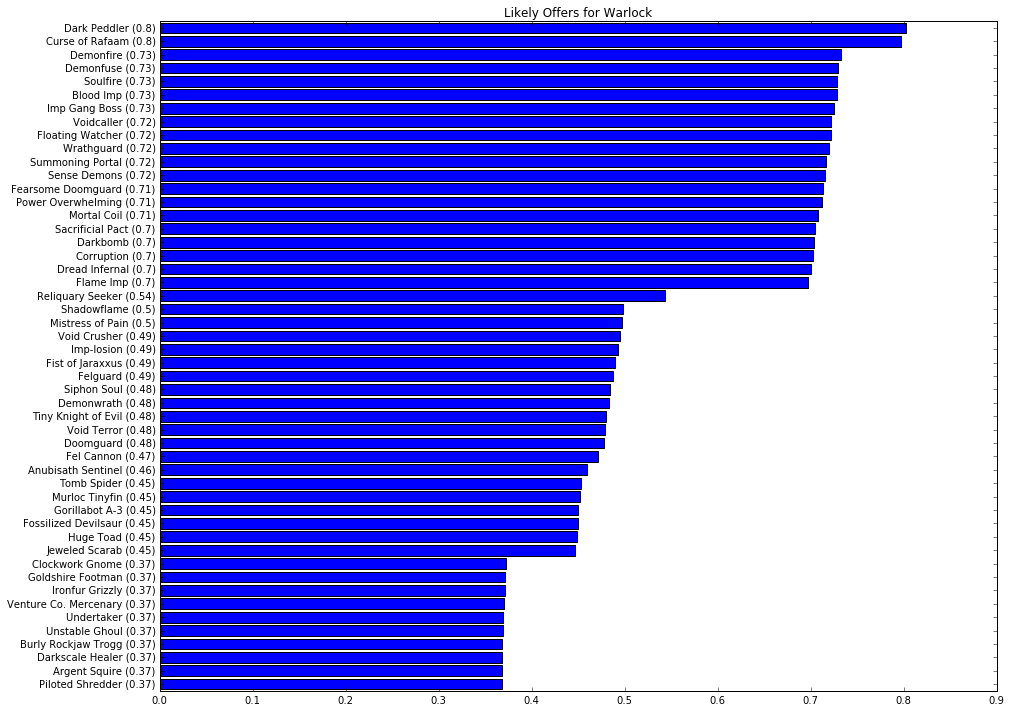

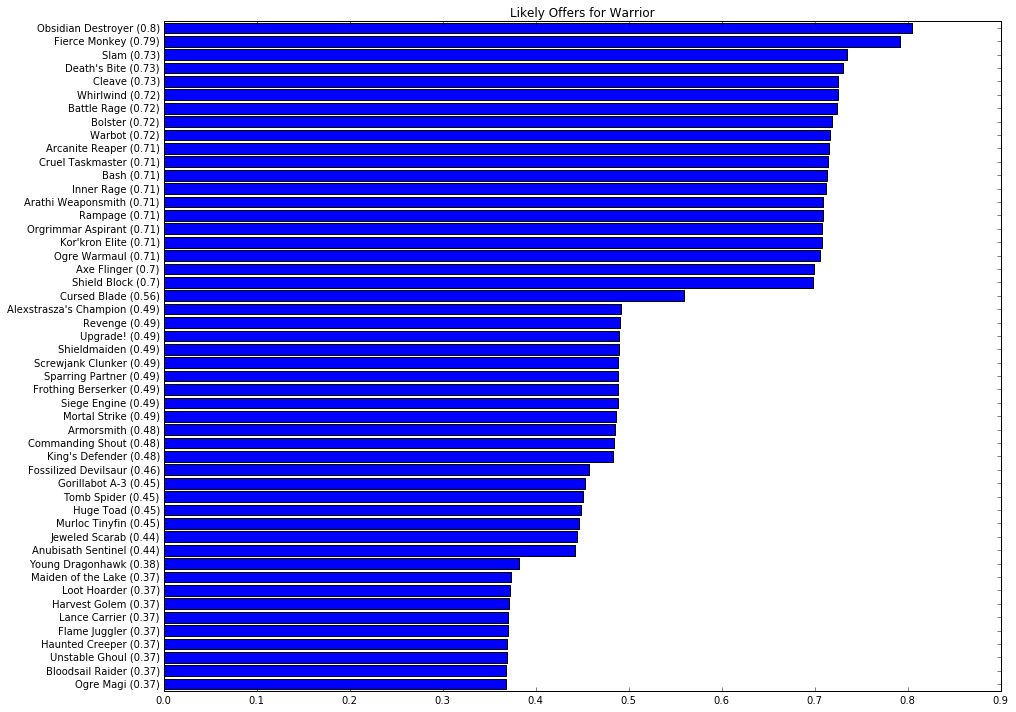

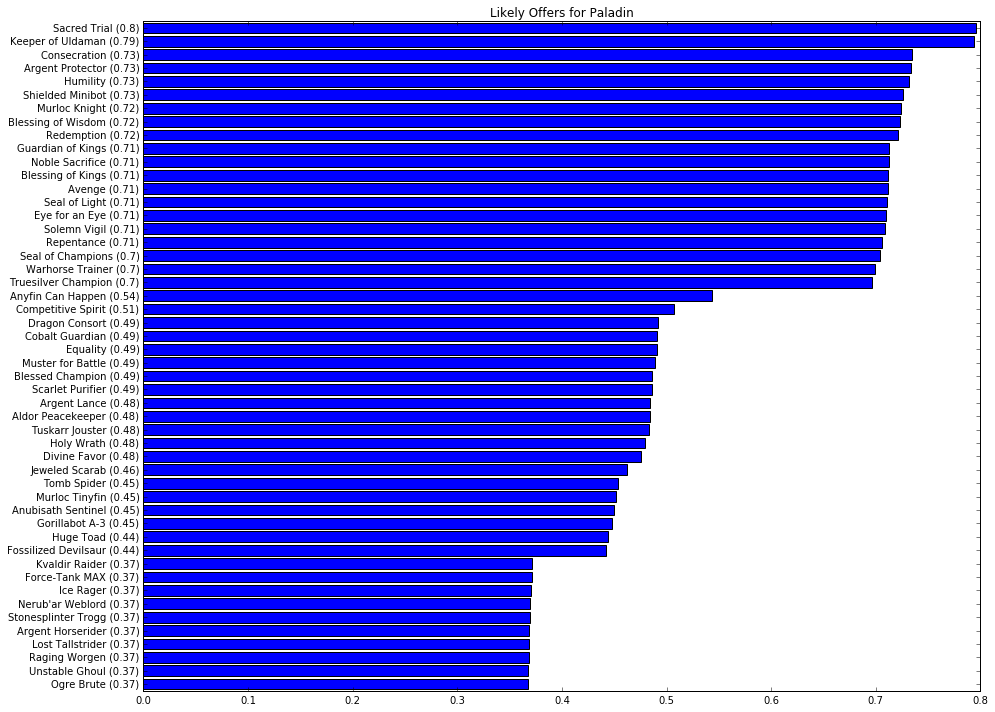

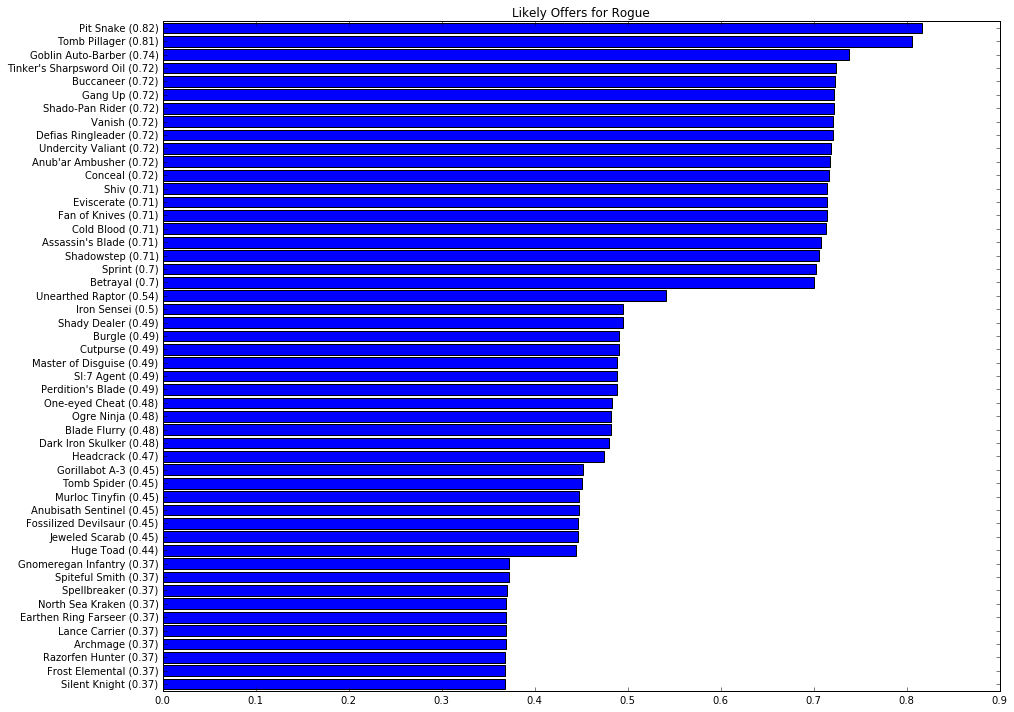

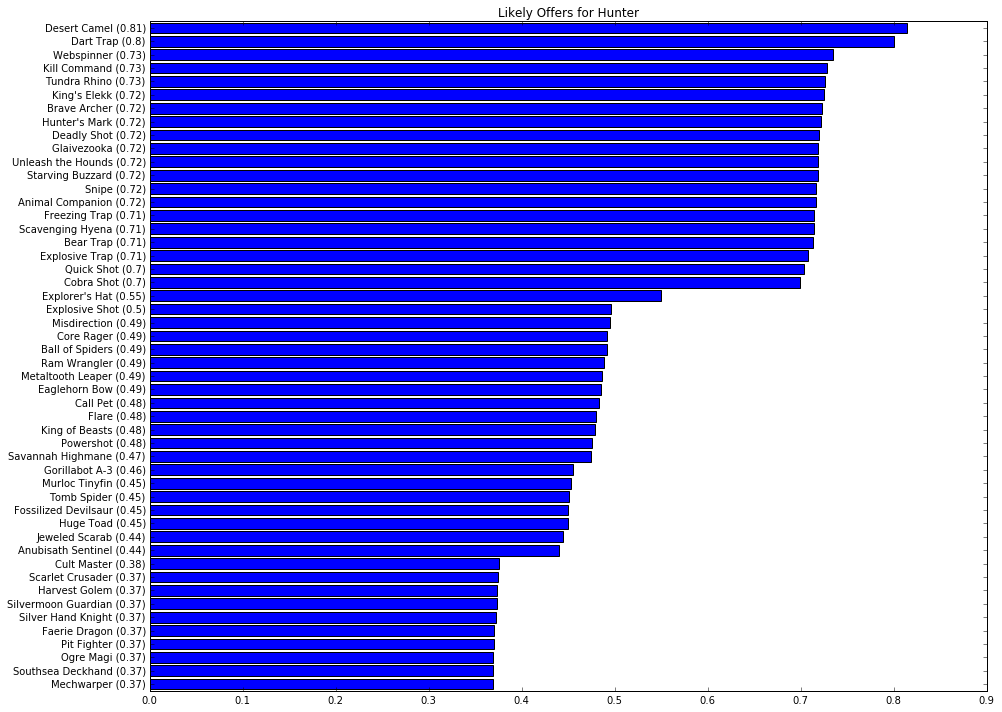

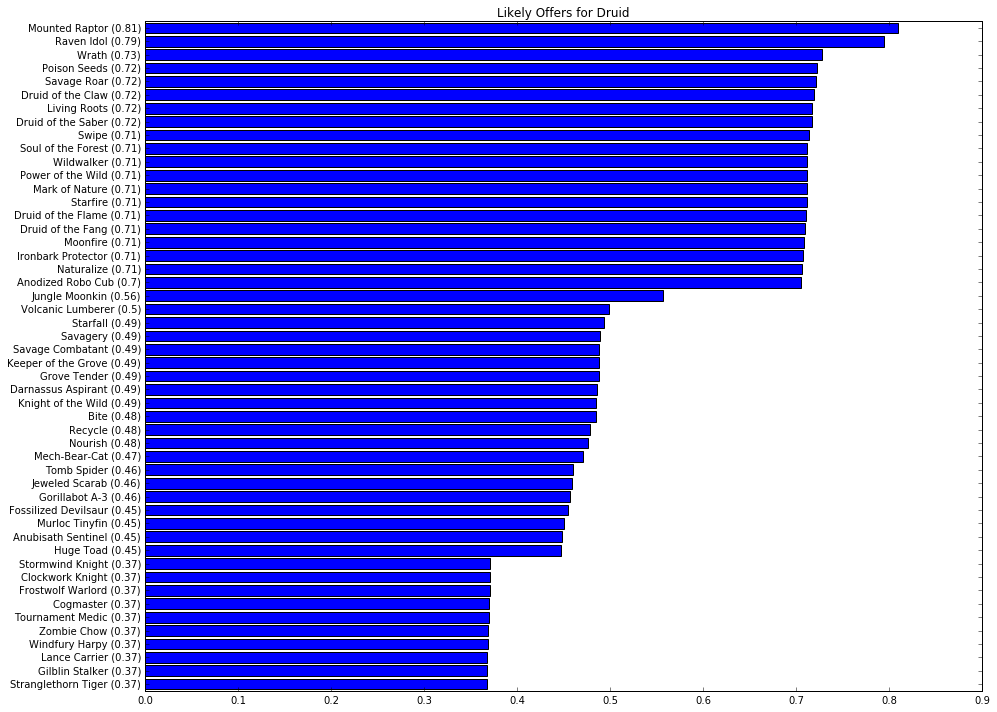

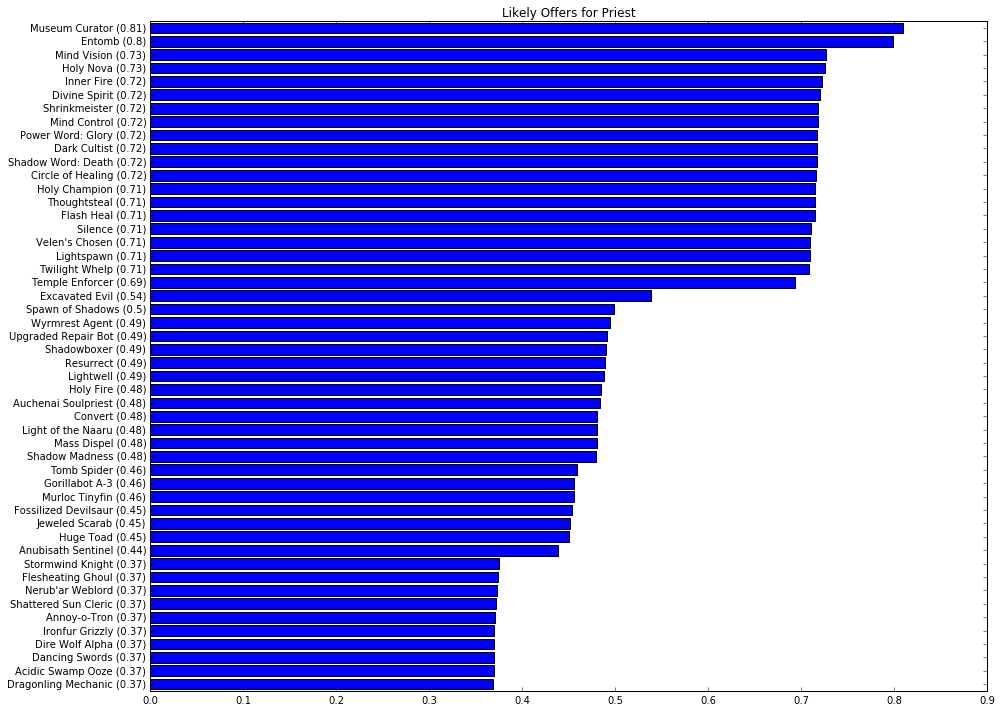

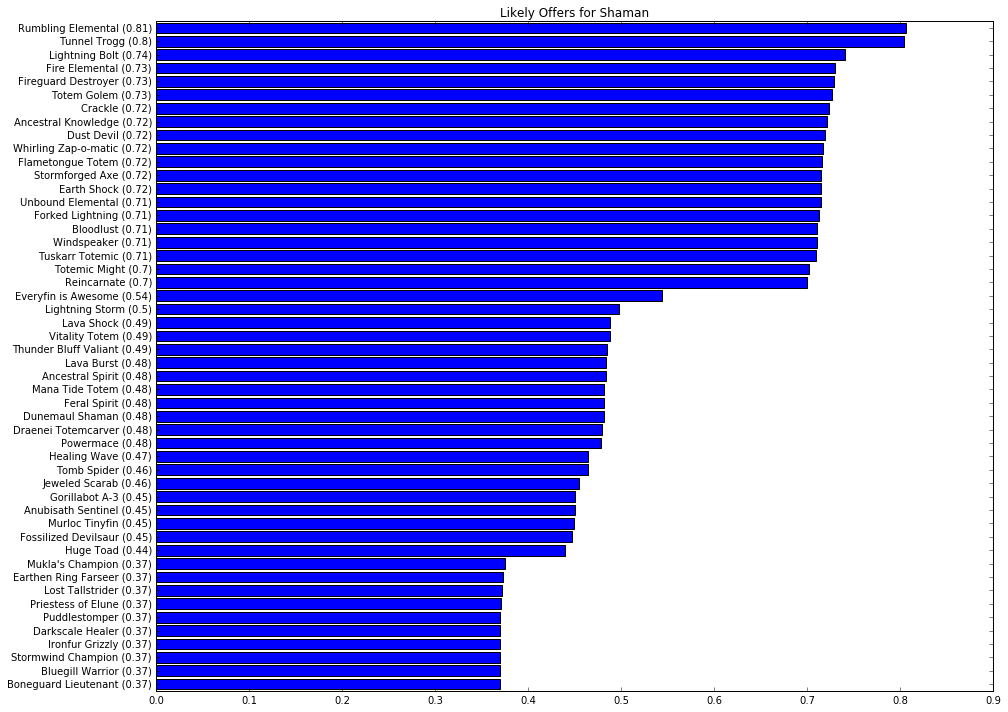

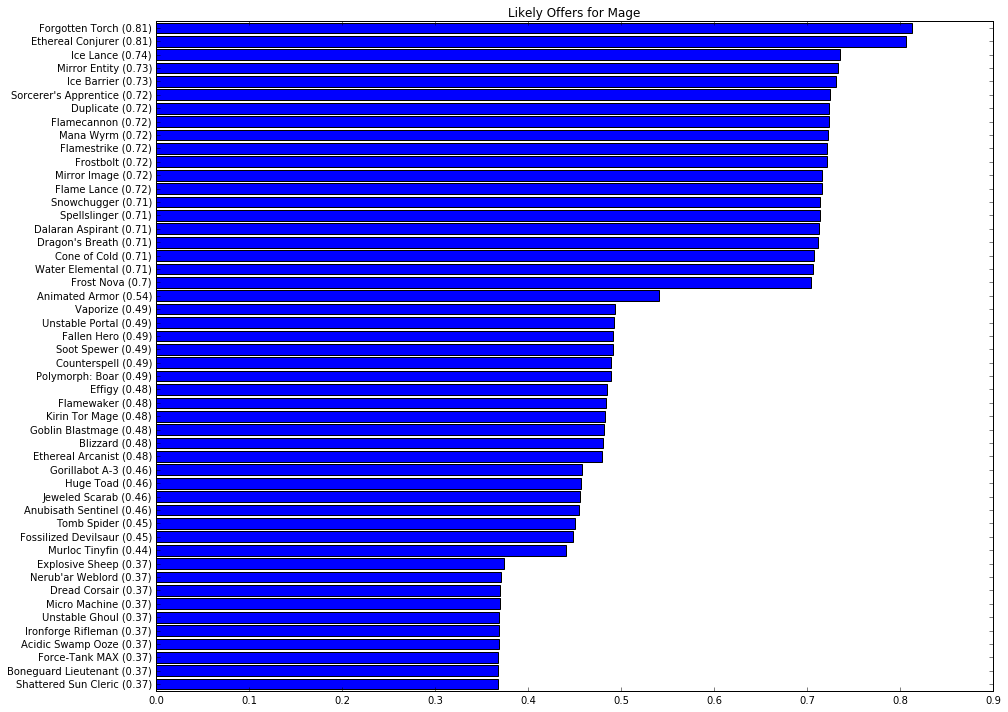

In [17]:
# And then graph them all using pyplot
for cls, card_counts in likely_cards.items():
    n = 50
    top = card_counts.most_common(n)
    pos = np.arange(n) + 0.5
    offer_labels = ["{} ({})".format(t[0], round(t[1] / 10000.0,2)) for t in reversed(top)]
    offer_counts = [t[1] / 10000.0 for t in reversed(top)]

    matplotlib.rcParams['figure.figsize'] = (15, 12)

    fig, ax = plt.subplots()
    rects = plt.barh(pos, offer_counts, align="center")
    plt.title("Likely Offers for {}".format(cls))
    plt.yticks(pos, offer_labels)
    plt.show()
